In [126]:
import pandas as pd

In [183]:
%run spotipy.ipynb

# Kaggle Auth

In [2]:

# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('The_name_of_the_dataset', path='the_path_you_want_to_download_the_files_to', unzip=True)

# Datasets

## Tracks
https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?resource=download&select=tracks.csv

In [105]:
tracks = pd.read_csv('../data/tracks.csv')

In [106]:
tracks = tracks.dropna()

In [141]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

## Charts
https://www.kaggle.com/datasets/jfreyberg/spotify-chart-data

In [130]:
charts = pd.read_csv('../data/charts.csv')

In [139]:
charts = charts.dropna()

In [14]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428021 entries, 0 to 5428020
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   country        object
 2   position       int64 
 3   streams        int64 
 4   track_id       object
 5   artists        object
 6   artist_genres  object
 7   duration       int64 
 8   explicit       bool  
 9   name           object
dtypes: bool(1), int64(3), object(6)
memory usage: 377.9+ MB


## Artists

In [142]:
artists = pd.read_csv('../data/artists.csv')

In [143]:
artists = artists.dropna()

In [144]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104336 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104336 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104336 non-null  object 
 3   name        1104336 non-null  object 
 4   popularity  1104336 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 50.6+ MB


# Clusterização

In [107]:
tracks.sort_values('popularity', ascending=False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4


In [108]:
data_dropped = tracks.drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date', 'popularity'])

In [109]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_data = scaler.fit_transform(data_dropped.values)

In [110]:
import numpy as np
from sklearn.decomposition import PCA

data_pca = PCA(n_components=3).fit_transform(norm_data)

In [111]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=60, n_init=4)
kmeans.fit(data_pca)
tracks['n_cluster'] = kmeans.labels_

In [112]:
tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_cluster
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,4
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,4
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,37
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,52
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,49
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,7
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,48
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,9


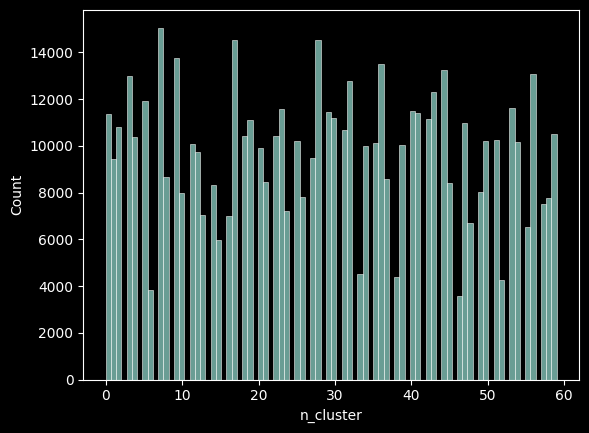

In [113]:
import seaborn as sns

fig = sns.histplot(data=tracks, x="n_cluster")

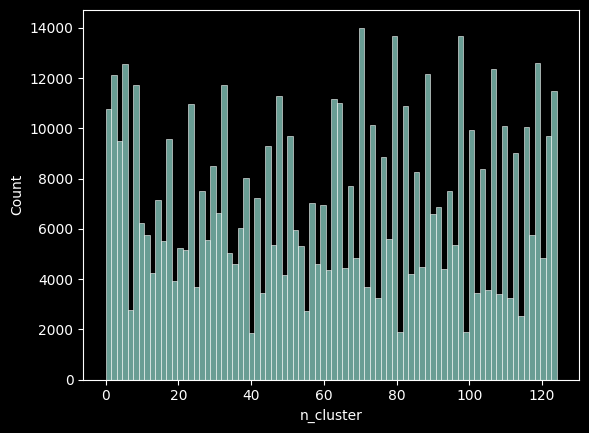

In [102]:
import seaborn as sns

fig = sns.histplot(data=tracks, x="n_cluster")

# History

## Long History

In [148]:
from itertools import count

# Lendo todos os arquivos relacionados ao histórico de longo prazo

history_group = []

x = 1
while(x):
    try:
        history_group.append(pd.read_json('../data/StreamingHistory'+ str(x-1) +'.json'))
        x += 1
    except FileNotFoundError:
        break

long_history_df = pd.concat(history_group)

In [149]:
# Dropando músicas tocadas por menos de 30 segundos

long_history = (
    long_history_df[long_history_df['msPlayed']>=30000]
    .sort_values(by='endTime', ascending=True)
    .reset_index()
    )

In [150]:
long_history_df.value_counts('trackName')

trackName
Snuff                                     89
Vermilion, Pt. 2                          76
Running Up That Hill (A Deal With God)    67
Como Tudo Deve Ser                        63
Nutshell                                  58
                                          ..
Role                                       1
Rocky Mountain Way                         1
Givin' It Up                               1
Glad You Came                              1
黄昏のBAY CITY                                1
Length: 3379, dtype: int64

## Recent History

In [151]:
recent_history_df = get_current_user_recently_played()

In [ ]:
recent_history_df

## Saved Tracks

In [152]:
saved_tracks_df = get_all_current_user_saved_tracks()
# gets ~86 tracks per second

In [153]:
saved_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 37
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist Name  1188 non-null   object
 1   Artist ID    1188 non-null   object
 2   Track Name   1188 non-null   object
 3   Track ID     1188 non-null   object
dtypes: object(4)
memory usage: 46.4+ KB


## Currently Playing

In [184]:
currently_playing_df = get_currently_playing()

In [185]:
currently_playing_df

,Context Type,URI,Track Name,Track ID,Album Name,Album ID,Artist Names,Artist IDs
0,artist,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,Best Friends - Remix,6I5gj0D4OEScl48BPFR0J1,Dawn FM (Alternate World),12INlMsFtBjyehNnawBv36,"[The Weeknd, Summer Walker]","[1Xyo4u8uXC1ZmMpatF05PJ, 57LYzLEk2LcFghVwuWbcuS]"


Steps:
- 1 currently playing

Always get:
- saved
- top tracks from artist
- recently played
- 

Context types:
- collection (saved)
  - get saved
- playlist (playlist, radio, mix)
  - get playlist
- none (searching tool)
  - get samples based purely on the current track
- artist (artist page)
  - get related artists and best tracks